In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
house_data = pd.read_csv('C:\kc_house_data.csv')

The dataset to be used is King County, Washington housing data. This dataset was found at [kaggle](https://www.kaggle.com/harlfoxem/housesalesprediction) and covers house sales in King County, Washington from May 2014 to May 2015.

### Introducing the Dataset

In [3]:
print(house_data.info())
house_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB
None


(21613, 21)

Of the columns in the dataset, most are self-explantory. Those that are not are explained here:

Waterfront: 1 if the property has a waterfront view, 0 otherwise

View: a rating of the property's view

Sqft_living15: the average living space of the 15 closest neighbors

Sqft_lot15: the average lot space of the 15 closest neighbors.

From the above `info` call it is apparent that there are no null values in the dataset. The next step is to visualize the data and determine which features are important as well as which features are categorical.

### Visualizing the Data

For this investigation, the target variable is **price**, so each column will be shown with its relation to **price**.

In [4]:
house_data.bedrooms.describe()

count    21613.000000
mean         3.370842
std          0.930062
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

From the above `describe` call, the house with 33 bedrooms is a clear outlier. Additionally, bedrooms will be treated as a categorical variable because houses are categorized based on the number of bedrooms and bathrooms they have (when searching for houses, people want a 2 bed/2 bath house, for example). Winsorizing the data will fix the outlier problem, and then the data can be visualized.

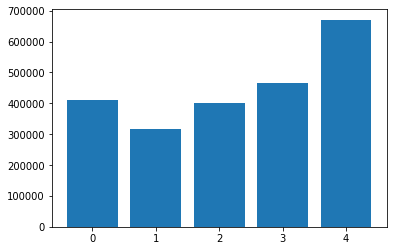

In [5]:
from scipy.stats.mstats import winsorize
house_data['winsorized_bedrooms'] = winsorize(house_data['bedrooms'],(0,.1))
plt.bar(house_data.groupby('winsorized_bedrooms')['price'].mean().index, house_data.groupby('winsorized_bedrooms')["price"].mean());

Apart from the houses with 0 bedrooms, there is a clearly positive correlation between number of bedrooms and house price.

In [6]:
house_data.condition.describe()

count    21613.000000
mean         3.409430
std          0.650743
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: condition, dtype: float64

Condition is also clearly a non-continuous categorical variable that ranges between 1 and 5.

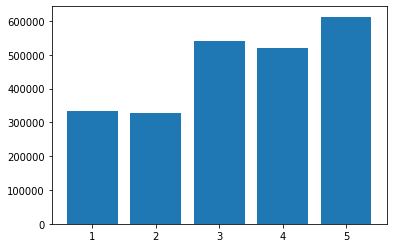

In [7]:
plt.bar(house_data.groupby('condition')['price'].mean().index, house_data.groupby('condition')["price"].mean());

Although the trend is less apparent than the bedrooms trend, it would appear that houses with higher overall conditions fetch higher prices.

In [8]:
house_data.bathrooms.describe()

count    21613.000000
mean         2.114757
std          0.770163
min          0.000000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

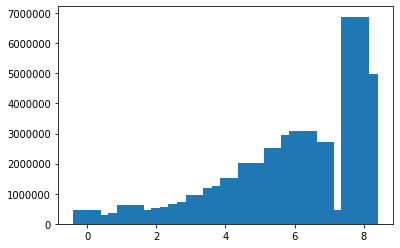

In [9]:
plt.bar(house_data.groupby('bathrooms')['price'].mean().index, house_data.groupby('bathrooms')["price"].mean());

In [10]:
house_data.bathrooms.unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 0.  , 1.25, 5.25, 6.  , 0.5 ,
       5.5 , 6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

As with bedrooms and condition, bathrooms is not a truly continuous variable (bathrooms are categorized in increments of one quarter). There is also a positive correlation between number of bathrooms and overall price.

In [11]:
house_data.sqft_living.describe()

count    21613.000000
mean      2079.899736
std        918.440897
min        290.000000
25%       1427.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

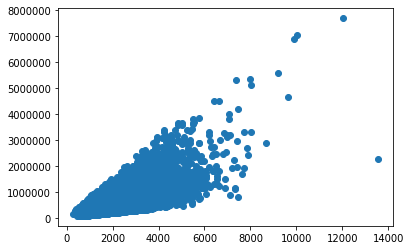

In [12]:
plt.scatter(house_data.sqft_living, house_data.price);

Living room sq. ft. is the first continuous feature in the set, and there is a clear positive trend between it and overall price.

In [13]:
house_data.sqft_lot.describe()

count    2.161300e+04
mean     1.510697e+04
std      4.142051e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.618000e+03
75%      1.068800e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

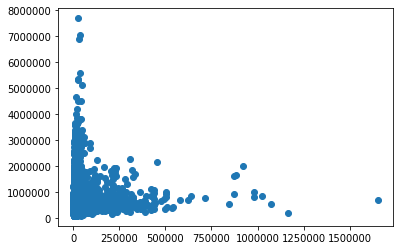

In [14]:
plt.scatter(house_data.sqft_lot, house_data.price);

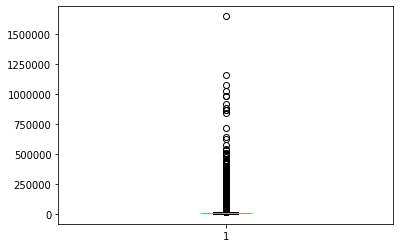

In [15]:
plt.boxplot(house_data.sqft_lot);

The above scatterplot shows that there may be a weak trend between overall lot square footage and price. The boxplot shows that most of the data points are outliers, so winsorizing this variable is sensible.

In [16]:
house_data['winsorized_lot_sqft'] = winsorize(house_data['sqft_lot'],(.1,.1))

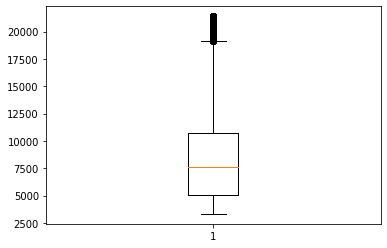

In [17]:
plt.boxplot(house_data.winsorized_lot_sqft);

Now that the data has been winsorized, the number of outliers has been reduced.

In [18]:
print(house_data.floors.unique())
house_data.floors.describe()

[1.  2.  1.5 3.  2.5 3.5]


count    21613.000000
mean         1.494309
std          0.539989
min          1.000000
25%          1.000000
50%          1.500000
75%          2.000000
max          3.500000
Name: floors, dtype: float64

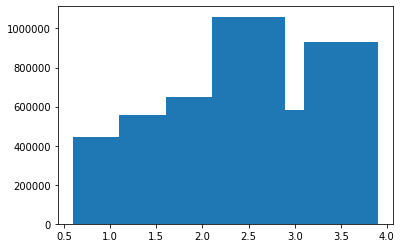

In [19]:
plt.bar(house_data.groupby('floors')['price'].mean().index, house_data.groupby('floors')["price"].mean());

The number of floors in a house is not a continuous variable, and there seems to be at least a weak correlation between number of floors and house price.

In [20]:
print(house_data.waterfront.unique())
house_data.waterfront.describe()

[0 1]


count    21613.000000
mean         0.007542
std          0.086517
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: waterfront, dtype: float64

In [21]:
house_data.groupby('waterfront')['price'].mean()

waterfront
0    5.315636e+05
1    1.661876e+06
Name: price, dtype: float64

Waterfront is a categorical variable that can only take 2 values: 0 or 1. Waterfront properties fetch higher prices on average than non-waterfront properties.

In [22]:
print(house_data.view.unique())
house_data.view.describe()

[0 3 4 2 1]


count    21613.000000
mean         0.234303
std          0.766318
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64

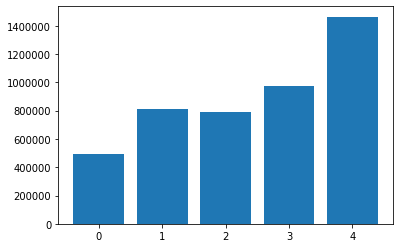

In [23]:
plt.bar(house_data.groupby('view')['price'].mean().index, house_data.groupby('view')["price"].mean());

View is another categorical variable, and there is a trend that houses with higher view values (i.e. better views) have higher prices.

In [24]:
print(house_data.grade.unique())
house_data.grade.describe()

[ 7  6  8 11  9  5 10 12  4  3 13  1]


count    21613.000000
mean         7.656873
std          1.175459
min          1.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         13.000000
Name: grade, dtype: float64

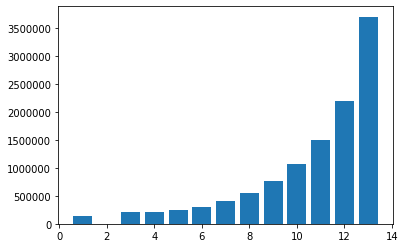

In [25]:
plt.bar(house_data.groupby('grade')['price'].mean().index, house_data.groupby('grade')["price"].mean());

Grade is yet another categorical variable, and there is a strongly positive trend between grade and price.

In [26]:
house_data.sqft_above.describe()

count    21613.000000
mean      1788.390691
std        828.090978
min        290.000000
25%       1190.000000
50%       1560.000000
75%       2210.000000
max       9410.000000
Name: sqft_above, dtype: float64

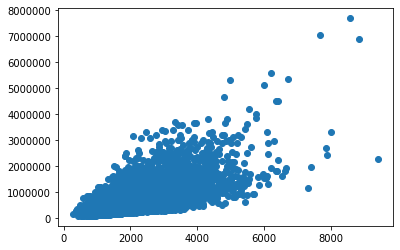

In [27]:
plt.scatter(house_data.sqft_above,house_data.price);

As expected, non-basement square footage is a continuous variable, and there is a positive correlation between it and price.

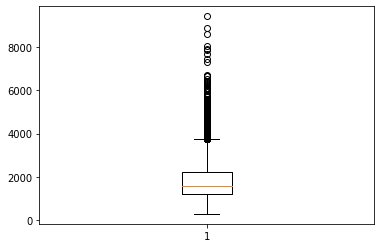

In [28]:
plt.boxplot(house_data.sqft_above);

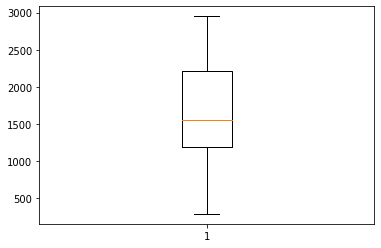

In [29]:
house_data['winsorized_above'] = winsorize(house_data.sqft_above,(0,.1))
plt.boxplot(house_data.winsorized_above);

The outliers in non-basement square footage have been winsorized, so the feature can be implemented into a model.

In [30]:
house_data.sqft_basement.describe()

count    21613.000000
mean       291.509045
std        442.575043
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: sqft_basement, dtype: float64

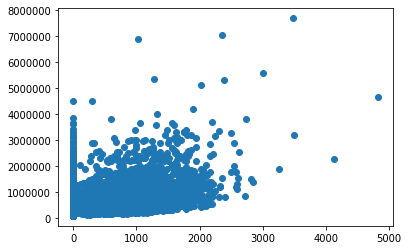

In [31]:
plt.scatter(house_data.sqft_basement,house_data.price);

There are many houses in the dataset that do not have basements and therefore have variable values of 0, but there still looks to be a positive trend between the variable and price.

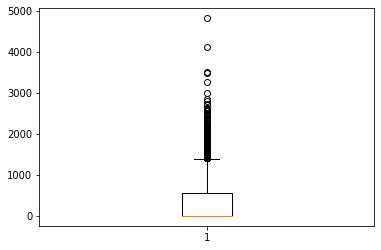

In [32]:
plt.boxplot(house_data.sqft_basement);

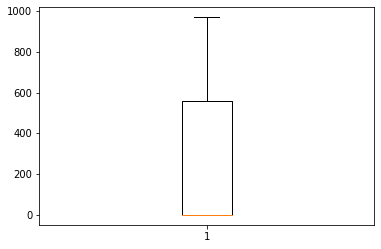

In [33]:
house_data['winsorized_basement'] = winsorize(house_data['sqft_basement'], (0,.1))
plt.boxplot(house_data.winsorized_basement);

The outliers in the basement square footage have now been removed, and the feature can be implemented in models.

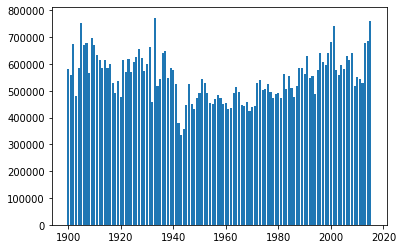

In [34]:
plt.bar(house_data.groupby('yr_built')['price'].mean().index, house_data.groupby('yr_built')["price"].mean());

Year built does not look to be a good predictor price.

In [35]:
house_data.yr_renovated.describe()

count    21613.000000
mean        84.402258
std        401.679240
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

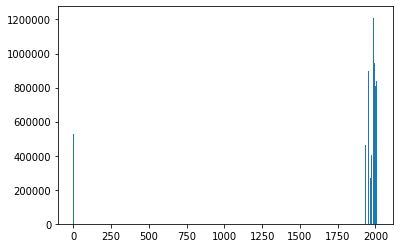

In [36]:
plt.bar(house_data.groupby('yr_renovated')['price'].mean().index, house_data.groupby('yr_renovated')["price"].mean());

Similarly, the year in which a house was renovated does not look to be a good indicator of price. This variable also shows either 0 for no renovation or the year the house was renovated. This makes it problematic for investigation.

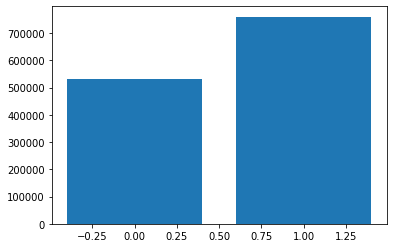

In [37]:
house_data.loc[house_data['yr_renovated']==0,'fixed_renovation'] = 0
house_data.loc[house_data['yr_renovated']!=0,'fixed_renovation'] = 1
plt.bar(house_data.groupby('fixed_renovation')['price'].mean().index, house_data.groupby('fixed_renovation')["price"].mean());

Now, the variable is a categorical feature using 0 if there were no renovations and 1 if there have been any renovations. The above graph shows that renovation indicates higher prices on average.

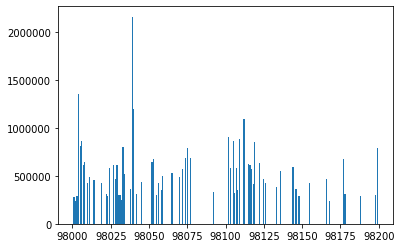

In [38]:
plt.bar(house_data.groupby('zipcode')['price'].mean().index, house_data.groupby('zipcode')["price"].mean());

From the above plot, it would appear that each general group of zipcodes exhibits the same overall pattern in house price. Therefore, zipcode is not likely to be a good predictor of price.

In [39]:
house_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'winsorized_bedrooms',
       'winsorized_lot_sqft', 'winsorized_above', 'winsorized_basement',
       'fixed_renovation'],
      dtype='object')

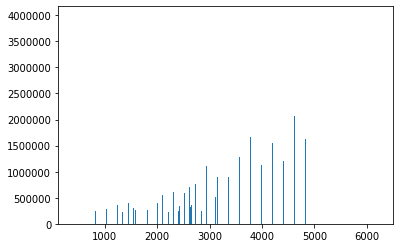

In [40]:
plt.bar(house_data.groupby('sqft_living15')['price'].mean().index, house_data.groupby('sqft_living15')["price"].mean());

The above bar graph suggests that the average interior square footage of the closest 15 neighbors may be a decent indicator of house price.

In [41]:
house_data.sqft_lot15.describe()

count     21613.000000
mean      12768.455652
std       27304.179631
min         651.000000
25%        5100.000000
50%        7620.000000
75%       10083.000000
max      871200.000000
Name: sqft_lot15, dtype: float64

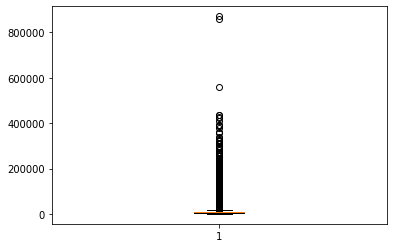

In [42]:
plt.boxplot(house_data.sqft_lot15);

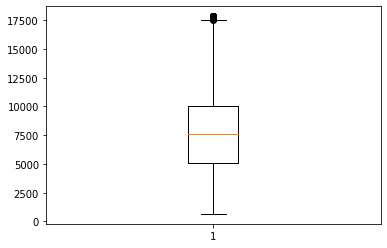

In [43]:
house_data['winsorized_lot15'] = winsorize(house_data.sqft_lot15,(0,.1))
plt.boxplot(house_data.winsorized_lot15);

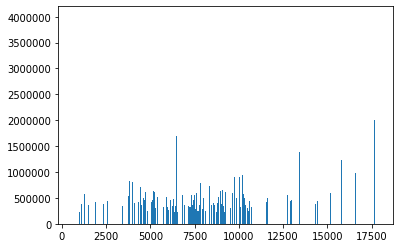

In [44]:
plt.bar(house_data.groupby('winsorized_lot15')['price'].mean().index, house_data.groupby('winsorized_lot15')["price"].mean());

After winsorizing the original average lot area of the closest 15 neighbors, the above graph suggests that the variable is not a good indicator of price.

Before looking at a correlation matrix and constructing dummy variables, the distribution of **price**, the target variable, must be investigated.

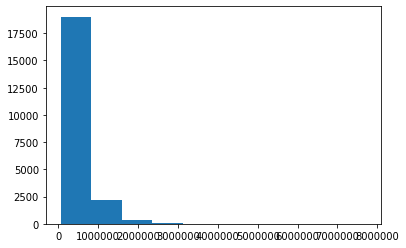

In [45]:
plt.hist(house_data.price);

The histogram above strongly suggests that this is not a normal distribution, but statistical tests can be used to confirm this suspicion.

In [46]:
from scipy.stats import jarque_bera
print(jarque_bera(house_data.price))

(1134998.2338603423, 0.0)


The Jarque-Bera test confirms that price is not normally distributed. To remedy this issue, a log transformation will be applied to the price variable.

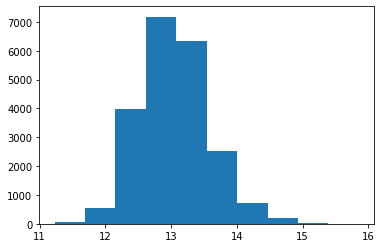

In [47]:
house_data['normalized_price'] = np.log1p(house_data.price)
plt.hist(house_data.normalized_price);

The target variable has been log transformed and is now more normally distributed. The next step is to create dummies for the categorical features in the dataset. The categorical features to be used: **winsorized_bedrooms, condition, bathrooms, floors, waterfront, view, grade, and fixed_renovation.**

In [48]:
house_data = pd.concat([house_data,pd.get_dummies(house_data.winsorized_bedrooms, prefix="wins_bed", drop_first=True)], axis=1)
house_data = pd.concat([house_data,pd.get_dummies(house_data.condition, prefix="cond", drop_first=True)], axis=1)
house_data = pd.concat([house_data,pd.get_dummies(house_data.bathrooms, prefix="bath", drop_first=True)], axis=1)
house_data = pd.concat([house_data,pd.get_dummies(house_data.floors, prefix="floor", drop_first=True)], axis=1)
house_data = pd.concat([house_data,pd.get_dummies(house_data.waterfront, prefix="water", drop_first=True)], axis=1)
house_data = pd.concat([house_data,pd.get_dummies(house_data.view, prefix="view", drop_first=True)], axis=1)
house_data = pd.concat([house_data,pd.get_dummies(house_data.grade, prefix="grade", drop_first=True)], axis=1)
house_data = pd.concat([house_data,pd.get_dummies(house_data.fixed_renovation, prefix="reno", drop_first=True)], axis=1)

All dummy variables have been created, so now it is time to choose the non-dummy variables to incorporate into the model. Although the data has already been visualized and there are visual indicators of correlations, it is important to view the correlation matrix to see if the visualizations represented the true correlations.

### Building Models

For this type of predictive task, a linear regression is the best model type to use, so a basic linear regression model will be constructed. For the first model, all continuous variables from the above correlation matrix and all dummy variables will be used.

In [49]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse

In [50]:
dummy_column_names = list(pd.get_dummies(house_data.winsorized_bedrooms, prefix="wins_bed", drop_first=True).columns)
dummy_column_names += list(pd.get_dummies(house_data.condition, prefix="cond", drop_first=True).columns)
dummy_column_names += list(pd.get_dummies(house_data.bathrooms, prefix="bath", drop_first=True).columns)
dummy_column_names += list(pd.get_dummies(house_data.floors, prefix="floor", drop_first=True).columns)
dummy_column_names += list(pd.get_dummies(house_data.waterfront, prefix="water", drop_first=True).columns)
dummy_column_names += list(pd.get_dummies(house_data.view, prefix="view", drop_first=True).columns)
dummy_column_names += list(pd.get_dummies(house_data.grade, prefix="grade", drop_first=True).columns)
dummy_column_names += list(pd.get_dummies(house_data.fixed_renovation, prefix="reno", drop_first=True).columns)

In [51]:
X = house_data[['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_lot15','sqft_living15'] + dummy_column_names]
Y = house_data['normalized_price']

X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

results = sm.OLS(y_train, X_train).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       normalized_price   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     467.9
Date:                Mon, 30 Dec 2019   Prob (F-statistic):               0.00
Time:                        06:53:24   Log-Likelihood:                -4830.9
No. Observations:               17290   AIC:                             9790.
Df Residuals:                   17226   BIC:                         1.029e+04
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.6539      0.321     36.339      0.000      11.025      12.283
sqft_living       0.0001   4.12e-06     29.813      0.000       0.000       0.000
sqft_lot       2.393e-07   8.18e-08      2.925      0.003    7.89e-08       4e-07
sqft_above     1.376e-05   4.27e-06      3.223      0.001    5.39e-06    2.21e-05
sqft_basement     0.0001   4.69e-06     23.300      0.000       0.000       0.000
sqft_lot15    -8.086e-07   1.27e-07     -6.360      0.000   -1.06e-06   -5.59e-07
sqft_living15     0.0001   6.16e-06     18.392      0.000       0.000       0.000
wins_bed_1        0.1627      0.159      1.022      0.307      -0.149       0.475
wins_bed_2        0.1683      0.158      1.063      0.288      -0.142       0.479
wins_bed_3        0.0639      0.158      0.404      0.686      -0.246       0.374
wins_bed_4        0.0540      0.158      0.341      0.733      -0.256       0.364
cond_2           -0.0501      0.073     -0.691      0.490      -0.192       0.092
cond_3            0.1018      0.067      1.510      0.131      -0.030       0.234
cond_4            0.1715      0.067      2.541      0.011       0.039       0.304
cond_5            0.2936      0.068      4.325      0.000       0.161       0.427
bath_0.5         -0.1995      0.238     -0.839      0.402      -0.666       0.267
bath_0.75         0.0745      0.180      0.414      0.679      -0.278       0.427
bath_1.0          0.0978      0.176      0.555      0.579      -0.247       0.443
bath_1.25         0.0598      0.213      0.280      0.780      -0.359       0.478
bath_1.5          0.0789      0.176      0.448      0.654      -0.266       0.424
bath_1.75         0.1110      0.176      0.630      0.528      -0.234       0.456
bath_2.0          0.1024      0.176      0.581      0.561      -0.243       0.448
bath_2.25         0.0877      0.176      0.498      0.619      -0.258       0.433
bath_2.5          0.0405      0.176      0.230      0.818      -0.305       0.386
bath_2.75         0.0864      0.176      0.490      0.624      -0.259       0.432
bath_3.0          0.1222      0.177      0.692      0.489      -0.224       0.468
bath_3.25         0.1497      0.177      0.847      0.397      -0.197       0.496
bath_3.5          0.1090      0.177      0.617      0.537      -0.237       0.455
bath_3.75         0.2269      0.178      1.271      0.204      -0.123       0.577
bath_4.0          0.1600      0.179      0.896      0.371      -0.190       0.510
bath_4.25         0.1553      0.181      0.858      0.391      -0.199       0.510
bath_4.5          0.1277      0.180      0.708      0.479      -0.226       0.481
bath_4.75         0.2194      0.194      1.129      0.259      -0.161       0.600
bath_5.0          0.1195      0.194      0.615      0.538      -0.261       0.500
bath_5.25         0.2787      0.200      1.396   

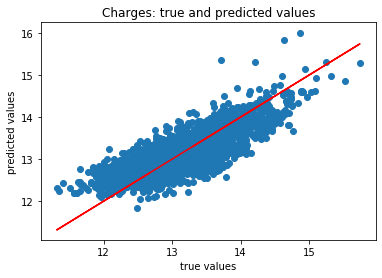

Mean absolute error of the prediction is: 0.26034007611624754
Mean squared error of the prediction is: 0.1059488338907267
Root mean squared error of the prediction is: 0.3254978247096695
Mean absolute percentage error of the prediction is: 2.004575687138499


In [52]:
y_preds = results.predict(X_test)
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print(f"Mean absolute error of the prediction is: {mean_absolute_error(y_test, y_preds)}")
print(f"Mean squared error of the prediction is: {mse(y_test, y_preds)}")
print(f"Root mean squared error of the prediction is: {rmse(y_test, y_preds)}")
print(f"Mean absolute percentage error of the prediction is: {np.mean(np.abs((y_test - y_preds) / y_test)) * 100}")

A basic model using non-transformed feature variables and the dummy variables that have been constructed does a relatively decent job of both explaining the variance in the dataset and making predictions. The task now is to see what improvements can be made.

In [53]:
house_data[['normalized_price','sqft_living','winsorized_lot_sqft','winsorized_above','winsorized_basement','sqft_living15','winsorized_lot15']].corr()

,normalized_price,sqft_living,winsorized_lot_sqft,winsorized_above,winsorized_basement,sqft_living15,winsorized_lot15
normalized_price,1.000000,0.695341,0.165338,0.572038,0.278845,0.619312,0.153331
sqft_living,0.695341,1.000000,0.346264,0.819930,0.357574,0.756420,0.338757
winsorized_lot_sqft,0.165338,0.346264,1.000000,0.295865,0.061064,0.382726,0.899820
winsorized_above,0.572038,0.819930,0.295865,1.000000,-0.132630,0.712722,0.294910
winsorized_basement,0.278845,0.357574,0.061064,-0.132630,1.000000,0.145868,0.060834
sqft_living15,0.619312,0.756420,0.382726,0.712722,0.145868,1.000000,0.408271
winsorized_lot15,0.153331,0.338757,0.899820,0.294910,0.060834,0.408271,1.000000


The above correlation matrix uses the continuous variables available and shows that all variables included have at least a weak (.15) correlation with the normalized_price target variable.

In [68]:
X = house_data[['sqft_living','winsorized_lot_sqft','winsorized_above','winsorized_basement','sqft_living15','winsorized_lot15']+dummy_column_names]
Y = house_data['normalized_price']
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

results = sm.OLS(y_train, X_train).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       normalized_price   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     480.5
Date:                Mon, 30 Dec 2019   Prob (F-statistic):               0.00
Time:                        06:59:48   Log-Likelihood:                -4597.3
No. Observations:               17290   AIC:                             9325.
Df Residuals:                   17225   BIC:                             9829.
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  11.8300      0.317     37.371      0.000      11.210      12.450
sqft_living          9.036e-05   1.21e-05      7.461      0.000    6.66e-05       0.000
winsorized_lot_sqft -5.004e-07   1.04e-06     -0.483      0.629   -2.53e-06    1.53e-06
winsorized_above        0.0001    1.5e-05      6.759      0.000    7.22e-05       0.000
winsorized_basement     0.0002   1.55e-05     12.295      0.000       0.000       0.000
sqft_living15           0.0001    6.2e-06     21.733      0.000       0.000       0.000
winsorized_lot15    -1.287e-05   1.32e-06     -9.748      0.000   -1.55e-05   -1.03e-05
wins_bed_1              0.2044      0.157      1.301      0.193      -0.104       0.512
wins_bed_2              0.2038      0.156      1.305      0.192      -0.102       0.510
wins_bed_3              0.1086      0.156      0.695      0.487      -0.198       0.415
wins_bed_4              0.0895      0.156      0.573      0.567      -0.217       0.396
cond_2                 -0.0380      0.072     -0.531      0.595      -0.178       0.102
cond_3                  0.0915      0.067      1.375      0.169      -0.039       0.222
cond_4                  0.1724      0.067      2.587      0.010       0.042       0.303
cond_5                  0.2836      0.067      4.231      0.000       0.152       0.415
bath_0.5               -0.2841      0.235     -1.210      0.226      -0.744       0.176
bath_0.75               0.0358      0.178      0.202      0.840      -0.312       0.384
bath_1.0                0.0383      0.174      0.221      0.825      -0.302       0.379
bath_1.25              -0.0234      0.211     -0.111      0.912      -0.436       0.389
bath_1.5                0.0122      0.174      0.070      0.944      -0.329       0.353
bath_1.75               0.0359      0.174      0.207      0.836      -0.305       0.376
bath_2.0                0.0245      0.174      0.141      0.888      -0.316       0.365
bath_2.25               0.0142      0.174      0.081      0.935      -0.327       0.355
bath_2.5               -0.0441      0.174     -0.254      0.800      -0.385       0.296
bath_2.75              -0.0045      0.174     -0.026      0.979      -0.346       0.337
bath_3.0                0.0299      0.174      0.172      0.864      -0.311       0.371
bath_3.25               0.0564      0.174      0.323      0.747      -0.286       0.398
bath_3.5                0.0092      0.174      0.053      0.958      -0.333       0.351
bath_3.75               0.1268      0.176      0.720      0.472      -0.219       0.472
bath_4.0                0.0750      0.176      0.425      0.671      -0.271       0.421
bath_4.25               0.0775      0.179      0.434      0.665      -0.273       0.428
bath_4.5                0.0443      0.178      0.249      0.803      -0.304       0.393
bat

This new model explains roughly 64% of the variance in the dataset; the AIC score is 9325; and the BIC is 9829. These metrics show that the new model is an improvement over the basic model.

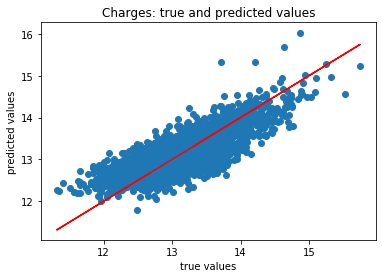

Mean absolute error of the prediction is: 0.25563029529458264
Mean squared error of the prediction is: 0.10321030527905001
Root mean squared error of the prediction is: 0.3212636071500319
Mean absolute percentage error of the prediction is: 1.968467395840532


In [69]:
y_preds = results.predict(X_test)
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print(f"Mean absolute error of the prediction is: {mean_absolute_error(y_test, y_preds)}")
print(f"Mean squared error of the prediction is: {mse(y_test, y_preds)}")
print(f"Root mean squared error of the prediction is: {rmse(y_test, y_preds)}")
print(f"Mean absolute percentage error of the prediction is: {np.mean(np.abs((y_test - y_preds) / y_test)) * 100}")

The above graph shows the model's predicted values (the red line) compared to the actual values in the dataset (blue points). The model looks to perform about the same for high, low, and intermediate values. All error metrics for this model are lower than the first model that was constructed using non-transformed variables. It may still be possible to make improvements to this model.

The next step is to remove features from the model that are not statistically significant. From the `results.summary` call earlier, all features have been given a p-value, and those with p-values significantly above .05 will be removed from the model. At this stage, any feature with a p-value greater than .10 will be removed. Of the non-dummy variables, winsorized_lot_sqft will be removed.

In [58]:
X = house_data[['sqft_living','winsorized_above','winsorized_basement','sqft_living15','winsorized_lot15']+dummy_column_names]
Y = house_data['normalized_price']

X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

results = sm.OLS(y_train, X_train).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       normalized_price   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     488.1
Date:                Mon, 30 Dec 2019   Prob (F-statistic):               0.00
Time:                        06:53:25   Log-Likelihood:                -4597.4
No. Observations:               17290   AIC:                             9323.
Df Residuals:                   17226   BIC:                             9819.
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  11.8292      0.317     37.370      0.000      11.209      12.450
sqft_living          8.992e-05   1.21e-05      7.446      0.000    6.63e-05       0.000
winsorized_above        0.0001    1.5e-05      6.774      0.000    7.24e-05       0.000
winsorized_basement     0.0002   1.55e-05     12.322      0.000       0.000       0.000
sqft_living15           0.0001   6.19e-06     21.769      0.000       0.000       0.000
winsorized_lot15    -1.342e-05   6.82e-07    -19.677      0.000   -1.48e-05   -1.21e-05
wins_bed_1              0.2038      0.157      1.297      0.195      -0.104       0.512
wins_bed_2              0.2032      0.156      1.300      0.193      -0.103       0.509
wins_bed_3              0.1081      0.156      0.692      0.489      -0.198       0.414
wins_bed_4              0.0891      0.156      0.571      0.568      -0.217       0.395
cond_2                 -0.0373      0.072     -0.521      0.603      -0.178       0.103
cond_3                  0.0928      0.067      1.395      0.163      -0.038       0.223
cond_4                  0.1737      0.067      2.609      0.009       0.043       0.304
cond_5                  0.2850      0.067      4.256      0.000       0.154       0.416
bath_0.5               -0.2841      0.235     -1.210      0.226      -0.744       0.176
bath_0.75               0.0357      0.178      0.201      0.840      -0.312       0.384
bath_1.0                0.0382      0.174      0.220      0.826      -0.302       0.379
bath_1.25              -0.0234      0.211     -0.111      0.912      -0.436       0.389
bath_1.5                0.0119      0.174      0.069      0.945      -0.329       0.353
bath_1.75               0.0356      0.174      0.205      0.838      -0.305       0.376
bath_2.0                0.0243      0.174      0.140      0.889      -0.316       0.365
bath_2.25               0.0138      0.174      0.080      0.937      -0.327       0.355
bath_2.5               -0.0443      0.174     -0.255      0.799      -0.385       0.296
bath_2.75              -0.0047      0.174     -0.027      0.978      -0.346       0.336
bath_3.0                0.0297      0.174      0.170      0.865      -0.312       0.371
bath_3.25               0.0561      0.174      0.322      0.748      -0.286       0.398
bath_3.5                0.0091      0.174      0.052      0.958      -0.333       0.351
bath_3.75               0.1266      0.176      0.719      0.472      -0.219       0.472
bath_4.0                0.0748      0.176      0.424      0.671      -0.271       0.420
bath_4.25               0.0773      0.179      0.433      0.665      -0.273       0.428
bath_4.5                0.0443      0.178      0.249      0.803      -0.304       0.393
bath_4.75               0.1649      0.192      0.860      0.390      -0.211       0.541
bat

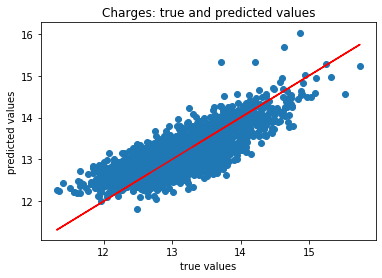

Mean absolute error of the prediction is: 0.2556384637192997
Mean squared error of the prediction is: 0.10320927308859912
Root mean squared error of the prediction is: 0.3212620006919572
Mean absolute percentage error of the prediction is: 1.968528807695872


In [59]:
y_preds = results.predict(X_test)
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print(f"Mean absolute error of the prediction is: {mean_absolute_error(y_test, y_preds)}")
print(f"Mean squared error of the prediction is: {mse(y_test, y_preds)}")
print(f"Root mean squared error of the prediction is: {rmse(y_test, y_preds)}")
print(f"Mean absolute percentage error of the prediction is: {np.mean(np.abs((y_test - y_preds) / y_test)) * 100}")

After the non-significant variable was removed, the AIC and BIC scores of the model have improved very slightly, but the error metrics have become very slightly worse. To hopefully strengthen the performance of the model, new features will be constructed from already existing data.

In [60]:
house_data['area_ratio'] = house_data['sqft_living']/house_data['sqft_lot']
house_data['lot_comp'] = house_data['sqft_lot']/house_data['sqft_lot15']
house_data['living_comp'] = house_data['sqft_living']/house_data['sqft_living15']

The `area_ratio` variable is a metric comparing living space to total lot space.
The `lot_comp` variable is a ratio of own lot space to the average of the nearest 15 neighbors' lots.
The `living_comp` variable is a ratio of own living space to the average of the nearest 15 neighbors' living spaces.

In [61]:
house_data[['normalized_price','winsorized_above','winsorized_basement','area_ratio','lot_comp','living_comp']].corr()

,normalized_price,winsorized_above,winsorized_basement,area_ratio,lot_comp,living_comp
normalized_price,1.000000,0.572038,0.278845,0.186688,0.039724,0.306195
winsorized_above,0.572038,1.000000,-0.132630,0.073187,0.054635,0.404602
winsorized_basement,0.278845,-0.132630,1.000000,0.076598,0.009086,0.371817
area_ratio,0.186688,0.073187,0.076598,1.000000,-0.136235,0.175577
lot_comp,0.039724,0.054635,0.009086,-0.136235,1.000000,0.074735
living_comp,0.306195,0.404602,0.371817,0.175577,0.074735,1.000000


In [82]:
X = house_data[['sqft_living','winsorized_above','winsorized_basement','sqft_living15','winsorized_lot15','area_ratio','lot_comp','living_comp']+dummy_column_names]
Y = house_data['normalized_price']

X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

results = sm.OLS(y_train, X_train).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       normalized_price   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     470.6
Date:                Mon, 30 Dec 2019   Prob (F-statistic):               0.00
Time:                        07:11:53   Log-Likelihood:                -4541.1
No. Observations:               17290   AIC:                             9216.
Df Residuals:                   17223   BIC:                             9736.
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  11.5959      0.316     36.649      0.000      10.976      12.216
sqft_living          2.131e-05   1.49e-05      1.435      0.151    -7.8e-06    5.04e-05
winsorized_above     7.636e-05   1.57e-05      4.868      0.000    4.56e-05       0.000
winsorized_basement     0.0001   1.61e-05      9.224      0.000       0.000       0.000
sqft_living15           0.0002   1.45e-05     16.017      0.000       0.000       0.000
winsorized_lot15    -9.713e-06    8.7e-07    -11.161      0.000   -1.14e-05   -8.01e-06
area_ratio              0.1197      0.017      7.140      0.000       0.087       0.153
lot_comp                0.0049      0.002      2.676      0.007       0.001       0.008
living_comp             0.1766      0.024      7.324      0.000       0.129       0.224
wins_bed_1              0.2027      0.157      1.294      0.196      -0.104       0.510
wins_bed_2              0.1911      0.156      1.227      0.220      -0.114       0.496
wins_bed_3              0.0972      0.156      0.624      0.533      -0.208       0.402
wins_bed_4              0.0799      0.156      0.513      0.608      -0.225       0.385
cond_2                 -0.0262      0.071     -0.367      0.714      -0.166       0.114
cond_3                  0.1057      0.066      1.593      0.111      -0.024       0.236
cond_4                  0.1883      0.066      2.836      0.005       0.058       0.318
cond_5                  0.2996      0.067      4.485      0.000       0.169       0.430
bath_0.5               -0.2573      0.234     -1.099      0.272      -0.716       0.202
bath_0.75               0.0519      0.177      0.293      0.770      -0.295       0.399
bath_1.0                0.0620      0.173      0.358      0.720      -0.277       0.402
bath_1.25              -0.0250      0.210     -0.119      0.905      -0.437       0.387
bath_1.5                0.0238      0.173      0.137      0.891      -0.316       0.364
bath_1.75               0.0462      0.173      0.267      0.790      -0.293       0.386
bath_2.0                0.0343      0.173      0.198      0.843      -0.305       0.374
bath_2.25               0.0248      0.173      0.143      0.886      -0.315       0.365
bath_2.5               -0.0329      0.173     -0.190      0.849      -0.372       0.307
bath_2.75               0.0018      0.173      0.010      0.992      -0.338       0.342
bath_3.0                0.0350      0.174      0.201      0.840      -0.305       0.375
bath_3.25               0.0612      0.174      0.352      0.725      -0.280       0.402
bath_3.5                0.0138      0.174      0.079      0.937      -0.327       0.354
bath_3.75               0.1379      0.176      0.785      0.432      -0.206       0.482
bath_4.0                0.0886      0.176      0.504      0.614      -0.256       0.433
bat

The addition of new features has slightly improved model performance. The R-Squared value is a little bit (.2%) higher, and the AIC and BIC scores are lower. All of the newly constructed features are statistically significant in the model.

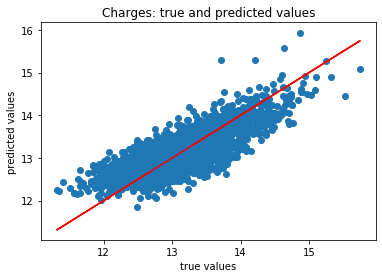

Mean absolute error of the prediction is: 0.2556973422189912
Mean squared error of the prediction is: 0.10271958043628272
Root mean squared error of the prediction is: 0.3204989554371164
Mean absolute percentage error of the prediction is: 1.968920474924913


In [63]:
y_preds = results.predict(X_test)
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print(f"Mean absolute error of the prediction is: {mean_absolute_error(y_test, y_preds)}")
print(f"Mean squared error of the prediction is: {mse(y_test, y_preds)}")
print(f"Root mean squared error of the prediction is: {rmse(y_test, y_preds)}")
print(f"Mean absolute percentage error of the prediction is: {np.mean(np.abs((y_test - y_preds) / y_test)) * 100}")

Prediction error is relatively similar to the previous model. MSE and RMSE are lower, but MAE and MAPE are slightly higher. Taken in conjunction with the updated R-Squared, AIC, and BIC, this model is an overall improvement.

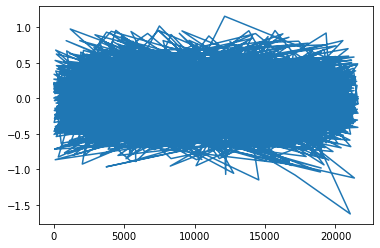

-0.00695090322607623


In [76]:
error = y_test - y_preds
plt.plot(error)
plt.show()
print(np.mean(error))

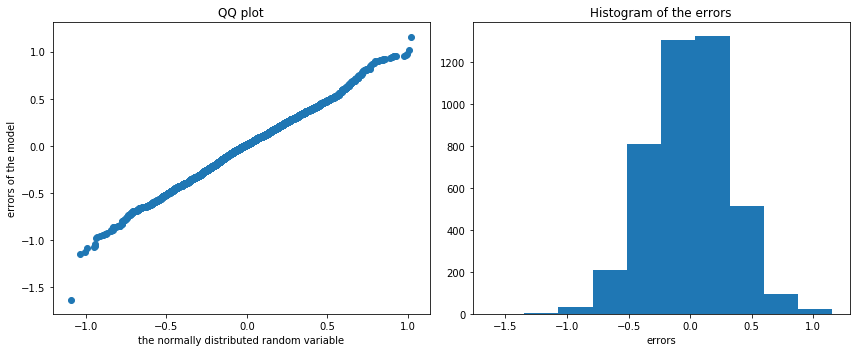

In [77]:
rand_nums = np.random.normal(np.mean(error), np.std(error), len(error))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(np.sort(rand_nums), np.sort(error)) # we sort the arrays
plt.xlabel("the normally distributed random variable")
plt.ylabel("errors of the model")
plt.title("QQ plot")

plt.subplot(1,2,2)
plt.hist(error)
plt.xlabel("errors")
plt.title("Histogram of the errors")

plt.tight_layout()
plt.show()

The above 3 graphs show that the errors from the model are not correlated (graph 1) and are fairly normal (graphs 2 and 3).

In [78]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest
jb_stats = jarque_bera(error)
norm_stats = normaltest(error)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 12.854460204696233 and p value is 0.0016169233496119428
Normality test statistics is 11.834353894639737 and p value is 0.002692791348607234


In conjunction with the previous graphs, the above Jarque-Bera and normality tests show that the errors are not exactly normally distributed, but the metric for each test is fairly low.

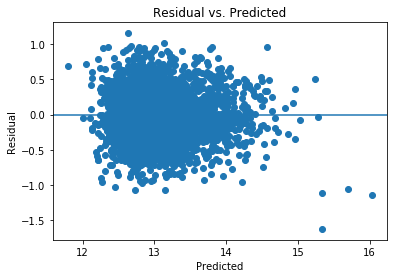

In [79]:
plt.scatter(y_preds, error)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

From the above graph, it is apparent that the model is not completely homoscedastic. While most of the residuals are clustered between 1 and -1, there are higher residuals for higher predicted values. This being said, the model is not heinously heteroscedastic.

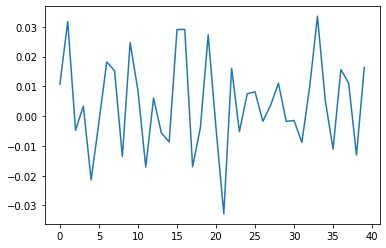

In [80]:
from statsmodels.tsa.stattools import acf

acf_data = acf(error)

plt.plot(acf_data[1:])
plt.show()

The above acf graph shows that the errors are not correlated with one another in any significant way. This is a good sign for the model.

Altogether, the assumptions of a linear model are mostly met. The errors are not exactly normally distributed, but they are not correlated with one another. Some of the model's features share some correlation, but most of the features have only weak correlations with other features. Furthermore, none of the features share a correlation over .9. Based on the model's overall performance as well as the tests on the errors and residuals, this model is performing well.

Although the model is in a fairly good state overall, it may be beneficial to implement regularization to see if the model can be improved. 3 types of regularization (ridge, lasso, and elasticnet) will be investigated.

In [64]:
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV

alphas = [np.power(10.0,p) for p in np.arange(-10,40,1)]

lasso_cv = LassoCV(alphas=alphas, cv=5)

lasso_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lasso_cv.predict(X_train)
y_preds_test = lasso_cv.predict(X_test)

print(f"Best alpha value is: {lasso_cv.alpha_}")
print(f"R-squared of the model in training set is: {lasso_cv.score(X_train, y_train)}")
print("-----Test set statistics-----")
print(f"R-squared of the model in test set is: {lasso_cv.score(X_test, y_test)}")
print(f"Mean absolute error of the prediction is: {mean_absolute_error(y_test, y_preds_test)}")
print(f"Mean squared error of the prediction is: {mse(y_test, y_preds_test)}")
print(f"Root mean squared error of the prediction is: {rmse(y_test, y_preds_test)}")
print(f"Mean absolute percentage error of the prediction is: {np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100}")

Best alpha value is: 0.0001
R-squared of the model in training set is: 0.6420575555845794
-----Test set statistics-----
R-squared of the model in test set is: 0.6310521490676763
Mean absolute error of the prediction is: 0.2553335513525254
Mean squared error of the prediction is: 0.10199018829648893
Root mean squared error of the prediction is: 0.31935902726631815
Mean absolute percentage error of the prediction is: 1.9661992902700747


In [65]:
ridge_cv = RidgeCV(alphas=alphas, cv=5)

ridge_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = ridge_cv.predict(X_train)
y_preds_test = ridge_cv.predict(X_test)

print(f"Best alpha value is: {ridge_cv.alpha_}")
print(f"R-squared of the model in training set is: {ridge_cv.score(X_train, y_train)}")
print("-----Test set statistics-----")
print(f"R-squared of the model in test set is: {ridge_cv.score(X_test, y_test)}")
print(f"Mean absolute error of the prediction is: {mean_absolute_error(y_test, y_preds_test)}")
print(f"Mean squared error of the prediction is: {mse(y_test, y_preds_test)}")
print(f"Root mean squared error of the prediction is: {rmse(y_test, y_preds_test)}")
print(f"Mean absolute percentage error of the prediction is: {np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100}")

Best alpha value is: 1.0
R-squared of the model in training set is: 0.6431568991941033
-----Test set statistics-----
R-squared of the model in test set is: 0.6299516572864187
Mean absolute error of the prediction is: 0.2555496716850947
Mean squared error of the prediction is: 0.10229440300787856
Root mean squared error of the prediction is: 0.3198349621412246
Mean absolute percentage error of the prediction is: 1.9678541908236165


In [66]:
elasticnet_cv = ElasticNetCV(alphas=alphas, cv=5)

elasticnet_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = elasticnet_cv.predict(X_train)
y_preds_test = elasticnet_cv.predict(X_test)

print(f"Best alpha value is: {elasticnet_cv.alpha_}")
print(f"R-squared of the model in training set is: {elasticnet_cv.score(X_train, y_train)}")
print("-----Test set statistics-----")
print(f"R-squared of the model in test set is: {elasticnet_cv.score(X_test, y_test)}")
print(f"Mean absolute error of the prediction is: {mean_absolute_error(y_test, y_preds_test)}")
print(f"Mean squared error of the prediction is: {mse(y_test, y_preds_test)}")
print(f"Root mean squared error of the prediction is: {rmse(y_test, y_preds_test)}")
print(f"Mean absolute percentage error of the prediction is: {np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100}")

Best alpha value is: 0.0001
R-squared of the model in training set is: 0.6425080329562507
-----Test set statistics-----
R-squared of the model in test set is: 0.6310825219045646
Mean absolute error of the prediction is: 0.2553789781593415
Mean squared error of the prediction is: 0.10198179217398674
Root mean squared error of the prediction is: 0.3193458817238556
Mean absolute percentage error of the prediction is: 1.966591469014977


Unfortunately, regularization (ridge, lasso, elasticnet) has not made any real improvements to the model. The R-Squared value for each type of regularization is about the same as the improved model that was constructed after the most basic model. Additionally, error metrics for each regularized model are about the same as the earlier, improved model.

### Interpreting the Model

Now that multiple models have been created and the best model has been selected, it is time to look over the coefficients and draw meaningful conclusions.

In [84]:
X = house_data[['sqft_living','winsorized_above','winsorized_basement','sqft_living15','winsorized_lot15','area_ratio','lot_comp','living_comp']+dummy_column_names]
Y = house_data['normalized_price']

X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

results = sm.OLS(y_train, X_train).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       normalized_price   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     470.6
Date:                Mon, 30 Dec 2019   Prob (F-statistic):               0.00
Time:                        07:15:47   Log-Likelihood:                -4541.1
No. Observations:               17290   AIC:                             9216.
Df Residuals:                   17223   BIC:                             9736.
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  11.5959      0.316     36.649      0.000      10.976      12.216
sqft_living          2.131e-05   1.49e-05      1.435      0.151    -7.8e-06    5.04e-05
winsorized_above     7.636e-05   1.57e-05      4.868      0.000    4.56e-05       0.000
winsorized_basement     0.0001   1.61e-05      9.224      0.000       0.000       0.000
sqft_living15           0.0002   1.45e-05     16.017      0.000       0.000       0.000
winsorized_lot15    -9.713e-06    8.7e-07    -11.161      0.000   -1.14e-05   -8.01e-06
area_ratio              0.1197      0.017      7.140      0.000       0.087       0.153
lot_comp                0.0049      0.002      2.676      0.007       0.001       0.008
living_comp             0.1766      0.024      7.324      0.000       0.129       0.224
wins_bed_1              0.2027      0.157      1.294      0.196      -0.104       0.510
wins_bed_2              0.1911      0.156      1.227      0.220      -0.114       0.496
wins_bed_3              0.0972      0.156      0.624      0.533      -0.208       0.402
wins_bed_4              0.0799      0.156      0.513      0.608      -0.225       0.385
cond_2                 -0.0262      0.071     -0.367      0.714      -0.166       0.114
cond_3                  0.1057      0.066      1.593      0.111      -0.024       0.236
cond_4                  0.1883      0.066      2.836      0.005       0.058       0.318
cond_5                  0.2996      0.067      4.485      0.000       0.169       0.430
bath_0.5               -0.2573      0.234     -1.099      0.272      -0.716       0.202
bath_0.75               0.0519      0.177      0.293      0.770      -0.295       0.399
bath_1.0                0.0620      0.173      0.358      0.720      -0.277       0.402
bath_1.25              -0.0250      0.210     -0.119      0.905      -0.437       0.387
bath_1.5                0.0238      0.173      0.137      0.891      -0.316       0.364
bath_1.75               0.0462      0.173      0.267      0.790      -0.293       0.386
bath_2.0                0.0343      0.173      0.198      0.843      -0.305       0.374
bath_2.25               0.0248      0.173      0.143      0.886      -0.315       0.365
bath_2.5               -0.0329      0.173     -0.190      0.849      -0.372       0.307
bath_2.75               0.0018      0.173      0.010      0.992      -0.338       0.342
bath_3.0                0.0350      0.174      0.201      0.840      -0.305       0.375
bath_3.25               0.0612      0.174      0.352      0.725      -0.280       0.402
bath_3.5                0.0138      0.174      0.079      0.937      -0.327       0.354
bath_3.75               0.1379      0.176      0.785      0.432      -0.206       0.482
bath_4.0                0.0886      0.176      0.504      0.614      -0.256       0.433
bat

From the above `summary` call, each feature's coefficient can be seen. Because the target variable has been log transformed, none of the coefficients can be particularly large, but it is interesting to note that many of them are very small. When talking about houses and the determining factors behind price, people generally suggest that location and total area are important. From the model, square footage has a very low coefficient (.00002131) and a p-value of .151. Since square footage is generally a large number (houses often have thousands of square feet), the low coefficient makes sense, but the p-value is a bit surprising.

The effect of location on house price is difficult to interpret from this model, since many of the variables that may comprise location are spread out over many dummy variables. That being said, the sqft_living15 and winsorized_lot15 provide some insight into location (larger houses are likely to be surrounded by large neighbors). For every thousand square feet of average living room space in neighboring houses, log transformed price will increase by .2. Similarly, for every thousand square feet of average lot space in neighboring houses, log transformed price decreases by .009.

For the constructed variables, when houses have large living-to-lot ratios (area_ratio feature), overall price will be higher, and when houses have smaller living-to-lot ratios, price will be lower. Additionally, when living space is greater than that of surrounding neighbors (living_comp feature), price will be higher, and when it is lower, price will be lower. These takeaways match intuitions, but it is interesting to note that lot space is less of a determining factor than living space (lot_comp feature).

### Further Work

The models that have been constructed for the purposes of this capstone have done a decent job of predicting the target variable, housing price. That being said, there is still room for improvement, especially if more data is added to the dataset. Potential candidates for additional data that would help the predictive power of models are: opening ask price, number of days the house was on the market, closing sale prices of surrounding houses, and interest rates on mortgages. These pieces of data would almost certainly make for more accurate predictive models.

### Conclusion

Predicting housing data is of great value to a variety of people: realtors and buyers want to get the best deals, while companies like Zillow are looking to shake up the industry by providing a quick and painless way to sell one's own home. Having a model that can accurately predict housing prices is incredibly valuable. The models constructed for this capstone do a decent job of making predictions and can be viewed as a good start to a much more powerful end goal. It is, however, important to note that doing such prediction is incredibly difficult. The market crash of 2008 deeply affected the housing industry and invalidated many pricing models simply because people could no longer afford the houses that they lived in. Constant changes in key factors in people's lives will greatly affect their abilities to purchase houses.